Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <<https://github.com/Kariellecirunay/CMSC-197.git>>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# %matplotlib inline

In [95]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [96]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [97]:
# Movie count of directors
director_counts = data['director_name'].value_counts()

# Show 10 data
topdirector_data = director_counts.head(11)

top10_directors = topdirector_data.reset_index()
top10_directors.columns = ['Director', 'Movie Count']

# Remove rows where the director name is '0'
top10_directors = top10_directors[top10_directors['Director'] != '0']

# Print 
top10_directors

,Director,Movie Count
1,Steven Spielberg,26
2,Woody Allen,22
3,Clint Eastwood,20
4,Martin Scorsese,20
5,Ridley Scott,17
6,Spike Lee,16
7,Steven Soderbergh,16
8,Tim Burton,16
9,Renny Harlin,15
10,Oliver Stone,14


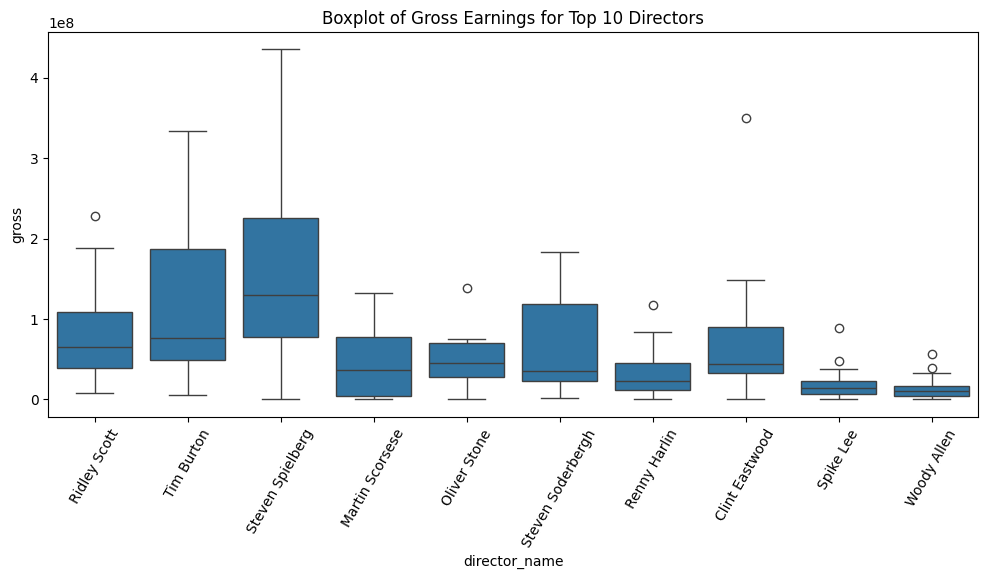

In [98]:
# Extract the list of top 10 directors
top_10_directors_list = top10_directors['Director'].tolist()

# Filter the dataset to exclude 0 and only movies directed by the top 10 directors
top10_directors_data = data[data['director_name'].isin(top_10_directors_list)]

# Create a boxplot from gross earnings for the top 10 directors
plt.figure(figsize=(12, 5))
sns.boxplot(x='director_name', y='gross', data=top10_directors_data)
plt.xticks(rotation=60)  
plt.title('Boxplot of Gross Earnings for Top 10 Directors')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

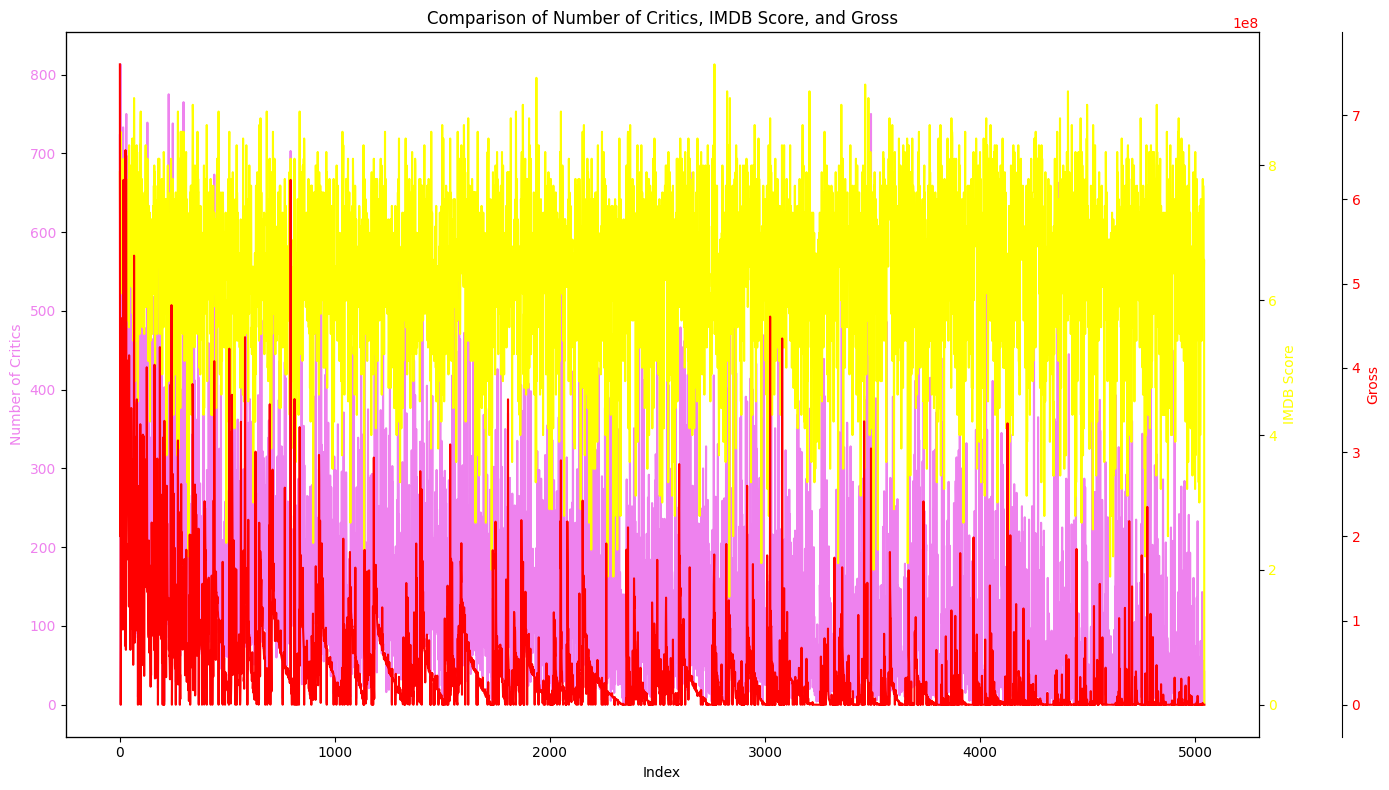

In [99]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot num_critic_for_reviews on the primary y-axis
ax1.set_xlabel('Index')
ax1.set_ylabel('Number of Critics', color='violet')
ax1.plot(data.index, data['num_critic_for_reviews'], color='violet', label='Number of Critics')
ax1.tick_params(axis='y', labelcolor='violet')

# Plot imdb_score on the secondary y-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('IMDB Score', color='yellow')  
ax2.plot(data.index, data['imdb_score'], color='yellow', label='IMDB Score')
ax2.tick_params(axis='y', labelcolor='yellow')

# Create another y-axis for the gross values
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  
ax3.set_ylabel('Gross', color='red')
ax3.plot(data.index, data['gross'], color='red', label='Gross')
ax3.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Number of Critics, IMDB Score, and Gross')

fig.tight_layout()
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [100]:
# Compute Sales by obtaining the difference between Gross and Budget
data['Sales'] = data['gross'] - data['budget']
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [101]:
# Group by director and calculate the total sales for each director
director_sales = data.groupby('director_name')['Sales'].sum().reset_index()

# Sort the directors by total sales in descending order
director_sales_sorted = director_sales.sort_values(by='Sales', ascending=False)

# Print the data DataFrame with the top 10 directors by total sales
director_sales_sorted.head(10)

,director_name,Sales
2159,Steven Spielberg,2.451332e+09
765,George Lucas,1.386641e+09
923,James Cameron,1.199626e+09
1219,Joss Whedon,1.000887e+09
335,Chris Columbus,9.417076e+08
1787,Peter Jackson,9.009693e+08
2221,Tim Burton,8.242755e+08
374,Christopher Nolan,8.082276e+08
1158,Jon Favreau,7.693815e+08
695,Francis Lawrence,7.555020e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

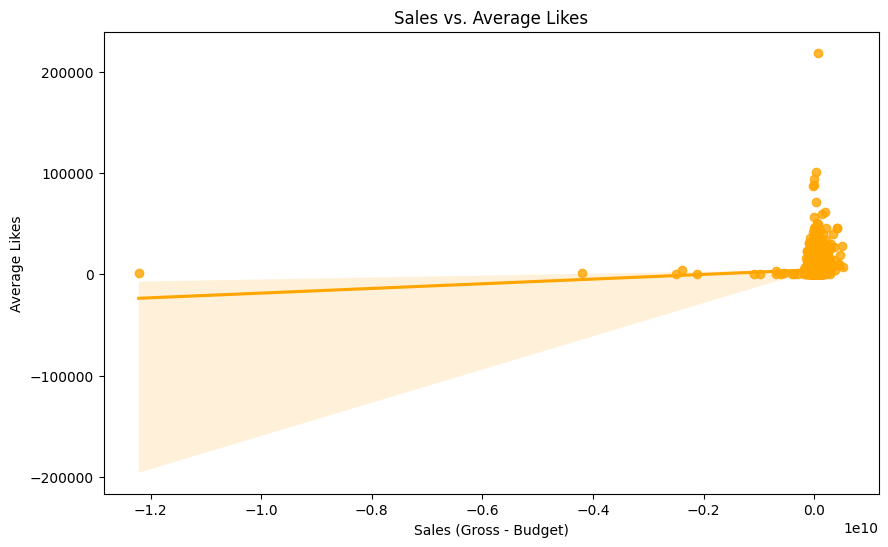

In [103]:
# Find columns that contain 'likes' in their name
like_columns = [column for column in data.columns if 'likes' in column.lower()]

# Calculate the average likes 
data['average_likes'] = data[like_columns].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.regplot(x='Sales', y='average_likes', data=data, scatter=True, color='orange')

plt.title('Sales vs. Average Likes')
plt.xlabel('Sales (Gross - Budget)')
plt.ylabel('Average Likes')

plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

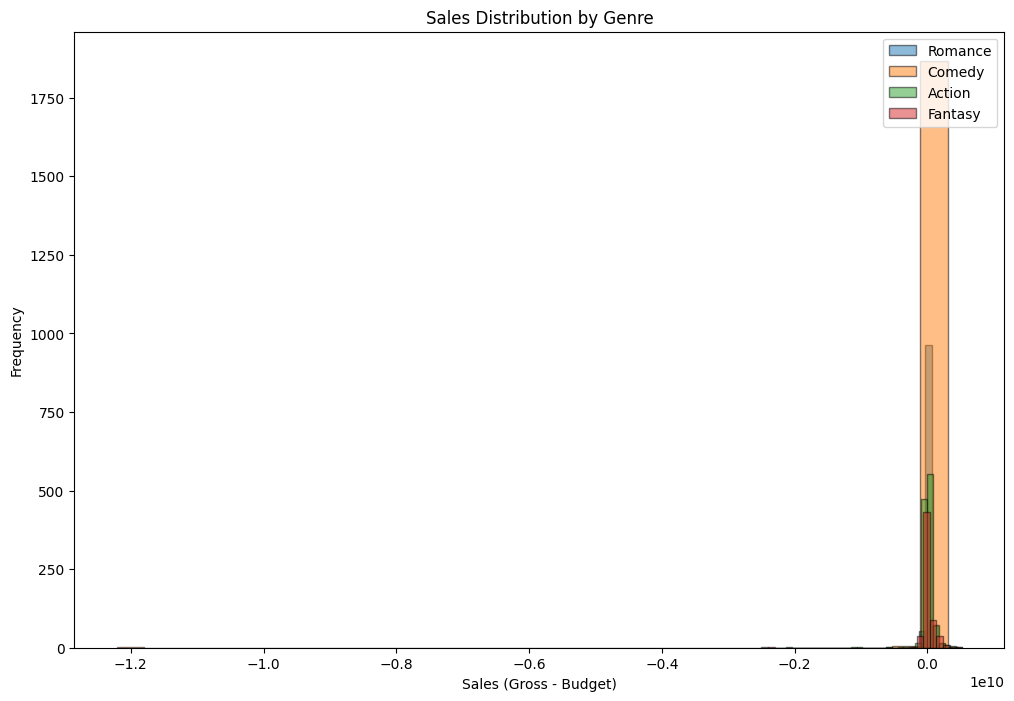

In [104]:
# Filter data for each genre
romance = data[data['genres'].str.contains('Romance', na=False)]['Sales']
comedy = data[data['genres'].str.contains('Comedy', na=False)]['Sales']
action = data[data['genres'].str.contains('Action', na=False)]['Sales']
fantasy = data[data['genres'].str.contains('Fantasy', na=False)]['Sales']

# Plot histograms
plt.figure(figsize=(12, 8))

# Plot histogram for Romance
plt.hist(romance, bins=30, alpha=0.5, label='Romance', edgecolor='black')

# Plot histogram for Comedy
plt.hist(comedy, bins=30, alpha=0.5, label='Comedy', edgecolor='black')

# Plot histogram for Action
plt.hist(action, bins=30, alpha=0.5, label='Action', edgecolor='black')

# Plot histogram for Fantasy
plt.hist(fantasy, bins=30, alpha=0.5, label='Fantasy', edgecolor='black')

# Add title and labels
plt.title('Sales Distribution by Genre')
plt.xlabel('Sales (Gross - Budget)')
plt.ylabel('Frequency')

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [14]:
# Compute the average likes of the three actors
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

# Display the first few rows to verify the new column
data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'average_actor_likes']]

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,average_actor_likes
0,1000.0,936.0,855.0,930.333333
1,40000.0,5000.0,1000.0,15333.333333
2,11000.0,393.0,161.0,3851.333333
3,27000.0,23000.0,23000.0,24333.333333
4,131.0,12.0,0.0,47.666667
...,...,...,...,...
5039,841.0,593.0,319.0,584.333333
5040,0.0,0.0,0.0,0.000000
5041,946.0,719.0,489.0,718.000000
5042,86.0,23.0,16.0,41.666667


## Copying the whole dataframe

In [15]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [18]:
# Identify columns
int_cols = df.select_dtypes(include=['int64']).columns

# Normalize the int columns
df[int_cols] = (df[int_cols] - df[int_cols].min()) / (df[int_cols].max() - df[int_cols].min())

df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,0.000397,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


In [19]:
# Identify columns
float_cols = df.select_dtypes(include=['float64']).columns

# Normalize the float columns
df[float_cols] = (df[float_cols] - df[float_cols].min()) / (df[float_cols].max() - df[float_cols].min())

df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,USA,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,USA,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,UK,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,USA,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
